In [108]:
#import packages
import pandas as pd
import numpy as np

In [109]:
#toplot withing notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [110]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 20,10

In [111]:
#for normalising data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [112]:
#read the file
df = pd.read_csv('/Users/roshanjain/Downloads/Data Science/Stock prediction/NSE-BSE.csv')

In [113]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,707.0,707.95,681.0,682.65,683.10,131700.0,910.52
1,2018-09-27,716.8,723.50,691.1,697.80,697.15,156222.0,1104.25
2,2018-09-26,720.0,724.40,709.0,710.00,711.60,71780.0,513.48
3,2018-09-25,725.0,725.00,710.5,715.00,718.15,93181.0,668.03
4,2018-09-24,725.3,728.00,712.0,721.00,721.90,126374.0,911.15


In [114]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

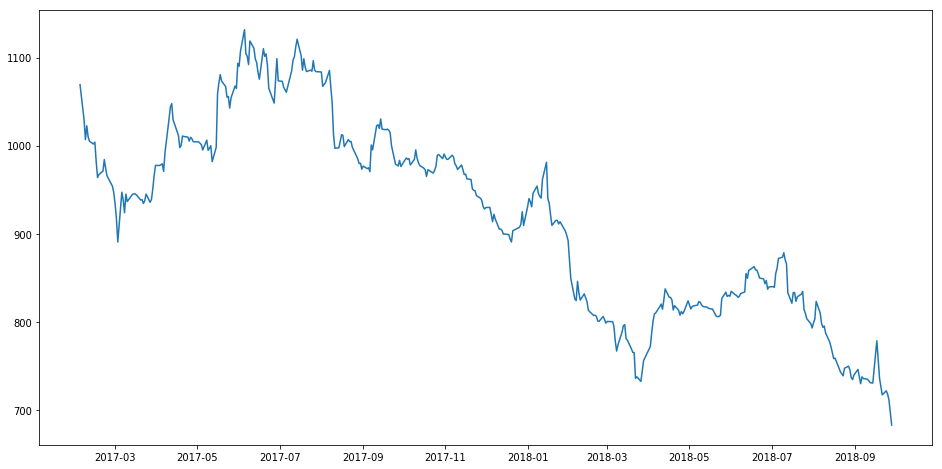

In [115]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label='Close Price History')

In [116]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])
new_data.head()

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [117]:
for i in range (0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


In [118]:
new_data.head()

,Date,Close
0,2017-02-03 00:00:00,1069.2
1,2017-02-06 00:00:00,1029.2
2,2017-02-07 00:00:00,1006.8
3,2017-02-08 00:00:00,1022.6
4,2017-02-09 00:00:00,1010.05


In [119]:
#create features
from fastai.tabular import add_datepart
add_datepart(new_data,'Date')





,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1069.2,2017,2,5,3,4,34,False,False,False,False,False,False,1486080000
1,1029.2,2017,2,6,6,0,37,False,False,False,False,False,False,1486339200
2,1006.8,2017,2,6,7,1,38,False,False,False,False,False,False,1486425600
3,1022.6,2017,2,6,8,2,39,False,False,False,False,False,False,1486512000
4,1010.05,2017,2,6,9,3,40,False,False,False,False,False,False,1486598400
5,1005,2017,2,6,10,4,41,False,False,False,False,False,False,1486684800
6,1001.8,2017,2,7,13,0,44,False,False,False,False,False,False,1486944000
7,1004,2017,2,7,14,1,45,False,False,False,False,False,False,1487030400
8,981.7,2017,2,7,15,2,46,False,False,False,False,False,False,1487116800
9,963.9,2017,2,7,16,3,47,False,False,False,False,False,False,1487203200


In [120]:
new_data['mon_fri'] = 0
for i in range (0,len(new_data)):
    if(new_data['Dayofweek'][i] == 0 or new_data['Dayofweek'][i] == 4):
        new_data['mon_fri'][i] = 1
    else:
        new_data['mon_fri'][i] = 0

/Users/roshanjain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/roshanjain/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
new_data.head()

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,mon_fri
0,1069.2,2017,2,5,3,4,34,False,False,False,False,False,False,1486080000,1
1,1029.2,2017,2,6,6,0,37,False,False,False,False,False,False,1486339200,1
2,1006.8,2017,2,6,7,1,38,False,False,False,False,False,False,1486425600,0
3,1022.6,2017,2,6,8,2,39,False,False,False,False,False,False,1486512000,0
4,1010.05,2017,2,6,9,3,40,False,False,False,False,False,False,1486598400,0


In [72]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]


x_train = train.drop('Close',axis=1)
y_train = train['Close']
x_valid = valid.drop('Close',axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
new_data.shape,train.shape,valid.shape
((1235,2),(987,2),(248,2))


((1235, 2), (987, 2), (248, 2))

In [123]:
preds=model.predict(x_train)
rms=np.sqrt(np.mean(np.power((np.array(y_train)-np.array(preds)),2)))
rms

0.3496533755051472

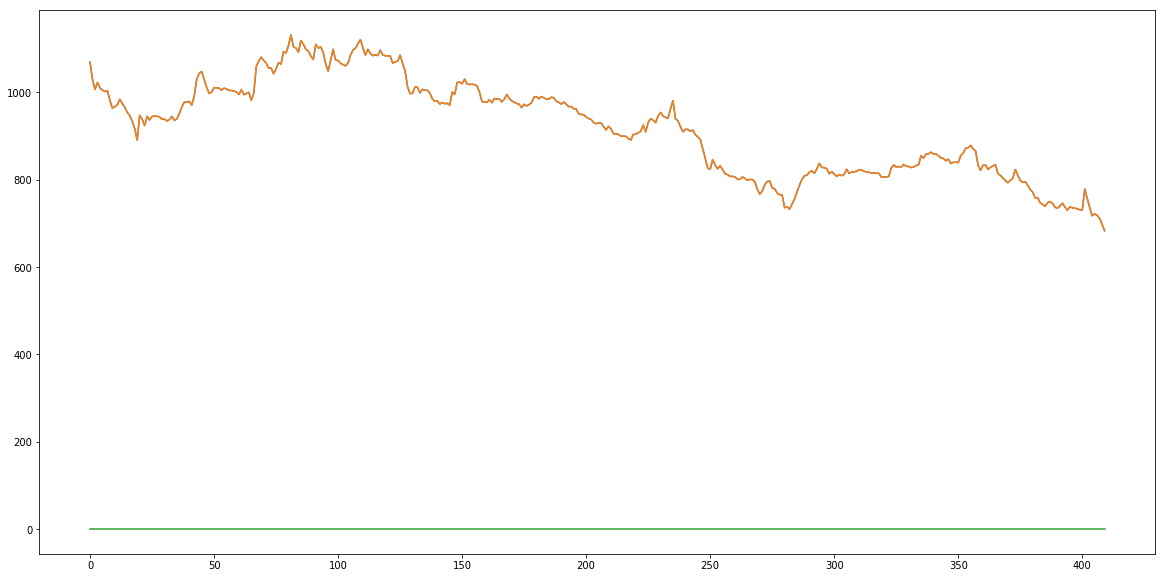

In [87]:
#make predictions and find the rmse


plt.plot(train['Close'])
plt.plot(train[['Close','Predictions']])




